In [4]:
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
os.getcwd()

'c:\\TCGA-LIHC'

Data Loading

In [10]:
# Load expression data
expr_data = pd.read_table("./gene_expression")
gene_list = expr_data['sample']
expr = expr_data.drop(['sample'],axis=1)
expr = expr.transpose()

# Load clinical data
# clinical_data = pd.read_table("./TCGA.LIHC.sampleMap_LIHC_clinicalMatrix")
# idx = []
# for sample in expr.index:
#     sampleID_list = clinical_data['sampleID'].tolist()
#     tmp = sampleID_list.index(sample)
#     idx.append(tmp)

# clinical_core = clinical_data.reindex(idx)
# clinical_core = clinical_core['sample_type']

# Standardize
scaler = StandardScaler()    
scaler.fit(expr)
expr_scaled = scaler.transform(expr)

expr_scaled = pd.DataFrame(expr_scaled, columns= gene_list)
# expr_scaled['target'] = clinical_core

expr_scaled


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
0,-0.032357,0.641510,1.676299,-0.840395,-1.605954,-1.644411,-0.798321,1.634566,-0.531075,0.541894,...,-0.615034,-0.552790,1.846878,0.716094,-0.364676,1.662951,0.156572,1.044825,1.993867,-0.163144
1,-0.258632,0.723876,-0.429310,-0.354441,1.383278,0.839586,-1.228453,0.046418,3.108355,-0.027975,...,-0.615034,1.111218,1.278468,-0.559670,-1.141977,-0.363374,-0.539094,0.355213,1.166248,-0.288466
2,0.052496,-0.110886,-0.429310,0.858523,-1.231490,0.292535,-0.266105,0.059315,-0.531075,0.016497,...,-0.005967,0.260283,-0.815637,-0.559670,0.799686,-1.429399,0.651509,0.323440,-0.826252,0.823900
3,-0.060919,-0.752857,-0.429310,2.378794,-1.030214,0.203673,0.373561,-1.285056,-0.531075,1.604371,...,0.003236,-0.554760,-0.460581,-0.211814,0.492696,-0.565930,0.466342,1.119975,-0.074076,4.756709
4,1.125219,0.362431,-0.429310,-0.967873,0.450524,-0.573301,1.115480,0.283970,-0.531075,0.734538,...,-0.615034,1.110848,-0.299338,-0.559670,-0.439111,0.597694,0.325968,1.478872,1.288518,0.890488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0.376795,-0.592591,-0.429310,0.044852,0.793243,0.621262,-1.280753,-0.622876,-0.531075,-0.311953,...,-0.615034,1.205410,-0.288006,-0.559670,-0.552136,0.258455,-1.053800,-0.184513,0.830999,0.100307
419,0.880643,0.203854,-0.429310,-0.107175,0.505705,0.267057,-0.164355,0.471194,-0.531075,0.360454,...,-0.615034,0.125766,0.418714,-0.559670,-0.324496,0.380976,0.061202,0.595306,0.970743,-0.471840
420,0.539568,-2.525322,-0.429310,1.041014,0.105977,-1.379482,-0.441610,-0.953892,-0.531075,0.819929,...,-0.615034,-0.502431,0.092035,3.427548,-2.271940,-1.908726,-1.865130,-0.342273,-0.474166,-0.445888
421,0.767783,-0.257033,-0.429310,0.894903,1.681453,-0.516546,-0.339693,0.615133,-0.531075,2.121980,...,3.094452,0.693261,0.025289,-0.559670,-1.017823,0.436858,0.189905,0.870074,0.890489,-1.110918


PCA

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(expr.iloc[:,:])

df_pca = pca.transform(expr.iloc[:,:])
df_pca = pd.DataFrame(df_pca, columns = ['PC1', 'PC2'])

df_pca

,PC1,PC2
0,22.434942,12.648805
1,-66.977808,93.673483
2,-0.860995,-30.098548
3,-31.587028,-23.232269
4,-40.775687,53.278141
...,...,...
418,-31.711909,89.292237
419,-37.418341,55.225130
420,36.471734,-83.457268
421,-18.125530,13.041610


In [25]:
print(pca.explained_variance_ratio_)

[0.12686351 0.100503  ]


Visualization

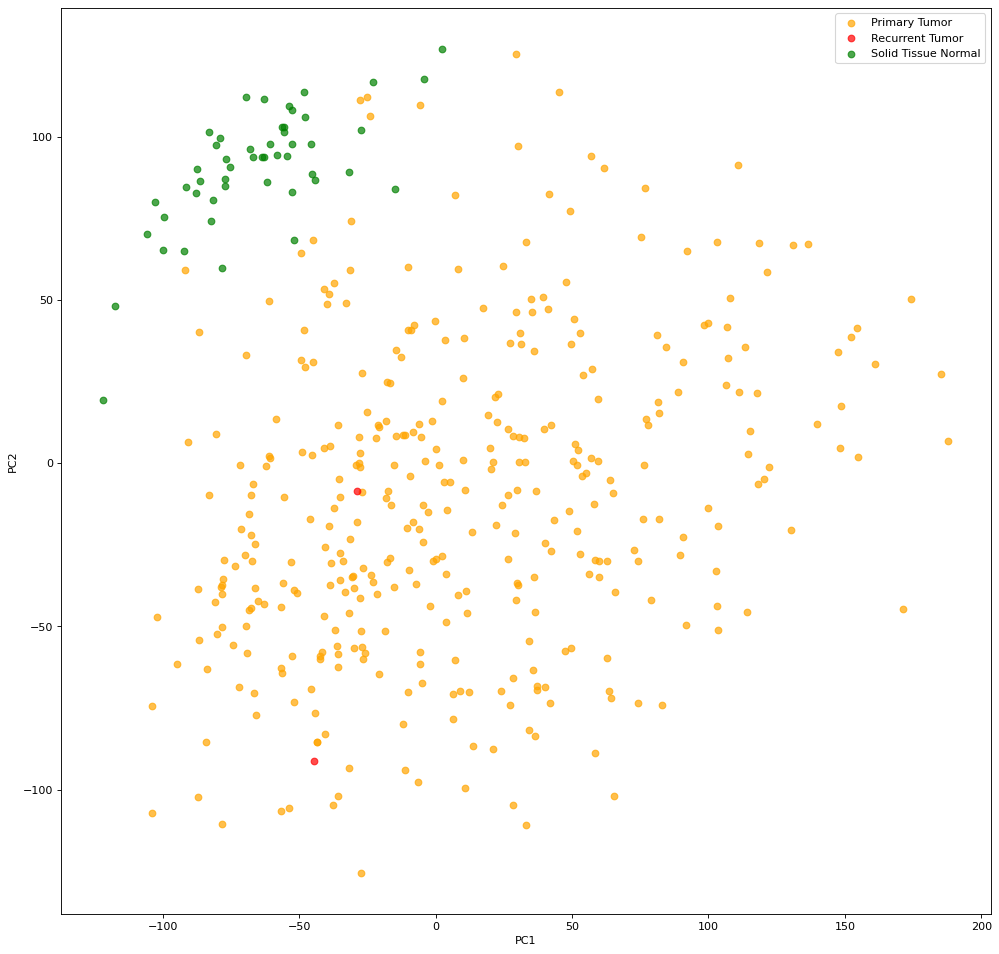

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 15), dpi=80)

# Load clinical data
clinical_data = pd.read_table("./TCGA.LIHC.sampleMap_LIHC_clinicalMatrix")
idx = []
for sample in expr.index:
    sampleID_list = clinical_data['sampleID'].tolist()
    tmp = sampleID_list.index(sample)
    idx.append(tmp)

clinical_core = clinical_data.reindex(idx)
clinical_core = clinical_core['sample_type']

clinical_core = clinical_core.to_numpy()

# clinical_core

df_pca['target'] = clinical_core
# df_pca

df_pca_0 = df_pca[df_pca['target'] == 'Primary Tumor']
df_pca_1 = df_pca[df_pca['target'] == 'Recurrent Tumor']
df_pca_2 = df_pca[df_pca['target'] == 'Solid Tissue Normal']

plt.scatter(df_pca_0['PC1'], df_pca_0['PC2'], color = 'orange', alpha = 0.7, label = 'Primary Tumor')
plt.scatter(df_pca_1['PC1'], df_pca_1['PC2'], color = 'red', alpha = 0.7, label = 'Recurrent Tumor')
plt.scatter(df_pca_2['PC1'], df_pca_2['PC2'], color = 'green', alpha = 0.7, label = 'Solid Tissue Normal')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()